<a href="https://colab.research.google.com/github/ppkk0906/Caba_nlp/blob/main/DL2_2_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 보스턴 주택가격 예측

In [ ]:
from keras.datasets import boston_housing
from keras import models, layers
import numpy as np
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

## 데이터 준비
상이한 스케일을 거진 값을 신경망에 주입하면 문제가 된다  
따라서 정규화를 한다. 정규화는 평균을 뺀 뒤 표준편차로 나누면 된다,  


In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std
histories=[]

In [ ]:
train_data[1]

array([-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
        1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
       -1.71818909,  0.43190599, -1.32920239])

## 모델 구성

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))

    model.compile(optimizer="rmsprop", loss="mse", metrics=["mean_absolute_error"])
    return model

k=4 
num_val_sam = len(train_data) // k # 검증 데이터의 비율
num_ephocs = 100
all_scores = []
for i in range(k):
    print("처리중인 폴드 #", i)
    #검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_sam : (i+1) * num_val_sam]
    val_targets = train_target[i * num_val_sam : (i+1) * num_val_sam]
    #훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_sam], train_data[(i+1) * num_val_sam:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_target[:i * num_val_sam], train_target[(i+1) * num_val_sam:]],
        axis=0
    )
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_ephocs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(test_data, test_target, verbose=0)
    all_scores.append(val_mae)
print("평균 MAE:", np.mean(all_scores).round(4))

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
평균 MAE: 2.7865


In [ ]:
k=5
num_val_sam = len(train_data) // k # 검증 데이터의 비율
num_ephocs = 500
all_scores = []
for i in range(k):
    print("처리중인 폴드 #", i)
    #검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_sam : (i+1) * num_val_sam]
    val_targets = train_target[i * num_val_sam : (i+1) * num_val_sam]
    #훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_sam], train_data[(i+1) * num_val_sam:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_target[:i * num_val_sam], train_target[(i+1) * num_val_sam:]],
        axis=0
    )
    model = build_model()
    histories.append(model.fit(partial_train_data, partial_train_targets, epochs=num_ephocs, batch_size=1, verbose=0))
    val_mse, val_mae = model.evaluate(test_data, test_target, verbose=0)
    all_scores.append(val_mae)
print("평균 MAE:", np.mean(all_scores).round(4))

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
처리중인 폴드 # 4
평균 MAE: 2.6306


In [ ]:
from keras import backend as K
import matplotlib.pyplot as plt
average_mae_history=[]
for i in range(num_ephocs):
    for history in histories:
        average_mae_history.append(np.mean(history.history["mean_absolute_error"][i]))

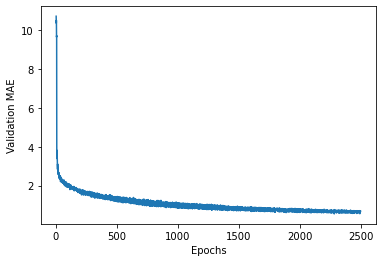

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

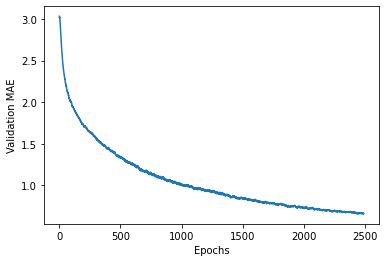

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()